# Sprint10-Project

Sprint10: A/B Testing

## Project Description

For Sprint 10's project, I am offered a postion as an analyst at a big online store.
Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.

The task is to prioritize these hypotheses, launch an A/B test, and analyze the results.

## Data Dictionary

The <code>hypothesis_us.csv</code> table will be used for the first part of the project.

- <code>hypothesis</code>: brief descriptions of the hypotheses
- <code>reach</code>: user reach, on a scale of 1 to 10
- <code>impact</code>: impact on users, on a scale of 1 to 10
- <code>confidence</code>: confidence in hypothesis, on a scale of 1 to 10
- <code>effort</code>: the resources required to test a hypothesis, on a scale of 1 to 10 (the higher the <code>effort</code> value , the more resource-intensive the test)

The <code>orders_us.csv</code> table will be used for the second part of the project.

- <code>transactionId</code>: order identifier
- <code>visitorId</code>: identifier of the user who placed the order
- <code>date</code>: date of the order
- <code>revenue</code>: revenue made from the order
- <code>group</code>: the A/B test group that the user belongs to

The <code>visits_us.csv</code> table will be used for the second part of the project.

- <code>date</code>: date of visit
- <code>group</code>: A/B test group
- <code>visits</code>: the number of visits on the date specified in the A/B test group specified


> - the the project description and data dictionary can also be found through my github repository for this project: https://github.com/stxphz/Hypothesis-Prioritization-and-A-B-Testing/blob/main/README.md

-----

In [87]:
# importing necessary packages to run code

import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st

> - the project package installation requirements can be found through my github repository for this project: https://github.com/stxphz/Hypothesis-Prioritization-and-A-B-Testing/blob/main/requirements.txt

-----

<h1><u>Part 1.</u>  <u>Priortizing Hypotheses</u></h1>

> for Part 1 of Project, use <b>'/datasets/hypotheses_us.csv'</b>

In [2]:
# read /hypotheses_us.csv file and storing it to the variable 'df_hypotheses' for the DataFrame

try:
    df_hypotheses = pd.read_csv('hypotheses_us.csv', sep=';') 
    print('The right path is hypotheses_us.csv')
except:
    df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';') 
    print('The right path is /datasets/hypotheses_us.csv')

pd.options.display.max_colwidth = 210 #added code to be able to view full content in 'hypothesis' column

display(df_hypotheses)

The right path is hypotheses_us.csv


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [3]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


> df_hypotheses.info() notes:
> - hypotheses column presents each row as one hypothesis (object datatype)
> - reach, impact, confidence, effort present as integer datatypes
> - no need convert datatypes of any columns at this time
> - rename columns to be lower case to standardize snakecase as the standard naming convention for this project

In [4]:
# rename column names to standardize format

df_hypotheses.rename(columns={'Hypothesis': 'hypothesis',
                          'Reach': 'reach',
                          'Impact': 'impact',
                          'Confidence': 'confidence',
                          'Effort': 'effort'
                          }, inplace=True)


# display dataframe to see column name changes
display(df_hypotheses)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [5]:
# validate there are no missing values in df_hypotheses dataset

print((df_hypotheses).isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64


> - no missing values in df_hypotheses

In [6]:
# make sure all strings in 'hypothese' column are identical where they are all lower case -- this is to check for any duplicate rows

df_hypotheses['hypothesis'] = df_hypotheses['hypothesis'].str.lower()
print(df_hypotheses['hypothesis'])

0                                               add two new channels for attracting traffic. this will bring 30% more users
1                                                         launch your own delivery service. this will shorten delivery time
2            add product recommendation blocks to the store's site. this will increase conversion and average purchase size
3    change the category structure. this will increase conversion since users will find the products they want more quickly
4                                          change the background color on the main page. this will increase user engagement
5                                                       add a customer review page. this will increase the number of orders
6                                   show banners with current offers and sales on the main page. this will boost conversion
7                                  add a subscription form to all the main pages. this will help you compile a mailing list
8       

In [7]:
# identify any duplicate values in df_hyptheses dataset

print(df_hypotheses.duplicated())
print()
print(f"total duplicate values: {df_hypotheses.duplicated().sum()}")

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

total duplicate values: 0


> - no duplicate values in  df_hypotheses

----

> <h1>Part 1 - Task #1 </h1>
> - Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [8]:
# ICE stands for impact, confidence, ease or effort is one of the most popular ways of prioritzing problems.
# impact -> how strongly this will affect users, their experience, and their satisfaction with the product
# confidence -> how sure you are that your product will affect the users in this way
# effort -> how much it will cost to test the hypothesis
# ICE score = (impact * confidence) / effort

df_hypotheses['ICE'] = ((df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort'])

display(df_hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,launch a promotion that gives users discounts on their birthdays,16.200000
0,add two new channels for attracting traffic. this will bring 30% more users,13.333333
7,add a subscription form to all the main pages. this will help you compile a mailing list,11.200000
6,show banners with current offers and sales on the main page. this will boost conversion,8.000000
2,add product recommendation blocks to the store's site. this will increase conversion and average purchase size,7.000000
1,launch your own delivery service. this will shorten delivery time,2.000000
5,add a customer review page. this will increase the number of orders,1.333333
3,change the category structure. this will increase conversion since users will find the products they want more quickly,1.125000
4,change the background color on the main page. this will increase user engagement,1.000000


> - hypothesis#8 has the highest ICE score whereas hypthesis#4 has the lowest ICE score.

> <h1>Part 1 - Task #2 </h1>
> - Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [9]:
# RICE is a modified version of ICE - incorportes a component 'R' that stands for reach
# reach -> how many users will be affected 
# RICE score = (reach * impact * confidence) / effort


df_hypotheses['RICE'] = ((df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort'])

display(df_hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,add a subscription form to all the main pages. this will help you compile a mailing list,112.0
2,add product recommendation blocks to the store's site. this will increase conversion and average purchase size,56.0
0,add two new channels for attracting traffic. this will bring 30% more users,40.0
6,show banners with current offers and sales on the main page. this will boost conversion,40.0
8,launch a promotion that gives users discounts on their birthdays,16.2
3,change the category structure. this will increase conversion since users will find the products they want more quickly,9.0
1,launch your own delivery service. this will shorten delivery time,4.0
5,add a customer review page. this will increase the number of orders,4.0
4,change the background color on the main page. this will increase user engagement,3.0


> - hypothesis#7 has the highest RICE score whereas hypothesis#4 has the lowest RICE score.

> <h1>Part 1 - Task #3 </h1>
> - Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [10]:
display(df_hypotheses)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,add two new channels for attracting traffic. this will bring 30% more users,3,10,8,6,13.333333,40.0
1,launch your own delivery service. this will shorten delivery time,2,5,4,10,2.000000,4.0
2,add product recommendation blocks to the store's site. this will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,change the category structure. this will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,change the background color on the main page. this will increase user engagement,3,1,1,1,1.000000,3.0
5,add a customer review page. this will increase the number of orders,3,2,2,3,1.333333,4.0
6,show banners with current offers and sales on the main page. this will boost conversion,5,3,8,3,8.000000,40.0
7,add a subscription form to all the main pages. this will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


In [11]:
# Sorting by ICE in descending order
df_ice_sorted = df_hypotheses.sort_values(by='ICE', ascending=False)

# Sorting by RICE in descending order
df_rice_sorted = df_hypotheses.sort_values(by='RICE', ascending=False)

# Displaying the sorted DataFrames
print("Sorted by ICE:")
display(df_ice_sorted)

print("\nSorted by RICE:")
display(df_rice_sorted)

Sorted by ICE:


,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
0,add two new channels for attracting traffic. this will bring 30% more users,3,10,8,6,13.333333,40.0
7,add a subscription form to all the main pages. this will help you compile a mailing list,10,7,8,5,11.200000,112.0
6,show banners with current offers and sales on the main page. this will boost conversion,5,3,8,3,8.000000,40.0
2,add product recommendation blocks to the store's site. this will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
1,launch your own delivery service. this will shorten delivery time,2,5,4,10,2.000000,4.0
5,add a customer review page. this will increase the number of orders,3,2,2,3,1.333333,4.0
3,change the category structure. this will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,change the background color on the main page. this will increase user engagement,3,1,1,1,1.000000,3.0



Sorted by RICE:


,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,add a subscription form to all the main pages. this will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,add product recommendation blocks to the store's site. this will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,add two new channels for attracting traffic. this will bring 30% more users,3,10,8,6,13.333333,40.0
6,show banners with current offers and sales on the main page. this will boost conversion,5,3,8,3,8.000000,40.0
8,launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,change the category structure. this will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,launch your own delivery service. this will shorten delivery time,2,5,4,10,2.000000,4.0
5,add a customer review page. this will increase the number of orders,3,2,2,3,1.333333,4.0
4,change the background color on the main page. this will increase user engagement,3,1,1,1,1.000000,3.0


> - prioritizing which hypotheses to test is important because testing hypotheses are expensive and resources are limited. It is also important to keep in mind to ensure the maximum growth of key business metrics when choosing which hyptheses to pursue. 
> - the higher the ICE/RICE score, the more promising the hypothesis will work out. 

> - when sorted by ICE method, hypothesis#8 has the highest score and seems most promising. However, when sorted by the RICE method, hypothesis#7 score is significantly higher than hypothesis#8. This is because in the RICE framework, it emphasizes not only the potential impact and confidence in a hypothesis but also considers the reach, ensuring that the hypotheses with the potential to impact a larger audience are prioritized, even if they required more effort. This often results in a shift in prioritization compared to ICE, where reach was not considered.


------

<h1><u>Part 2.</u>  <u>A/B Test Analysis</u></h1>

> for Part 2 of Project, use <b>'/datasets/orders_us.csv'</b> and <b>'/datasets/visits_us.csv'</b>

In [12]:
# read /orders_us.csv file and storing it to the variable 'df_orders' for the DataFrame

try:
    df_orders = pd.read_csv('orders_us.csv', sep=',') 
    print('The right path is hypotheses_us.csv')
except:
    df_orders = pd.read_csv('/datasets/orders_us.csv', sep=',') 
    print('The right path is /datasets/orders_us.csv')

display(df_orders)

The right path is hypotheses_us.csv


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [13]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


> df_orders.info() notes:
> - rename columns transactionId and visitorId to snakecase as the standard naming convention for this project
> - transactionId and visitorId are integer datatypes -- convert to object datatypes
> - date is a object type -- convert to datetime object type

In [14]:
# rename column names to standardize format to snakecase

df_orders.rename(columns={'transactionId': 'transaction_id',
                          'visitorId': 'visitor_id'
                          }, inplace=True)


# display dataframe to see column name changes
display(df_orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [15]:
# convert 'transactionId' and 'visitorId' integer datatype to object datatype
df_orders['transaction_id'] = df_orders['transaction_id'].astype('str')

df_orders['visitor_id'] = df_orders['visitor_id'].astype('str')

In [16]:
# convert 'date' column from object datatype to datetime64 datatype
df_orders['date'] = pd.to_datetime(df_orders['date'])


df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   object        
 1   visitor_id      1197 non-null   object        
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.9+ KB


In [17]:
# validate there are no missing values in orders dataset

print((df_orders).isna().sum())

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


> - no missing values in df_orders

In [18]:
# identify any duplicate values in orders dataset

print(df_orders.duplicated())
print()
print(f"total duplicate values: {df_orders.duplicated().sum()}")

0       False
1       False
2       False
3       False
4       False
        ...  
1192    False
1193    False
1194    False
1195    False
1196    False
Length: 1197, dtype: bool

total duplicate values: 0


> - no duplicate values in df_orders

In [108]:
# Are there the same number of unique users in Group A and Group B?
#v2 edit: counting how many users in Group A and how many users in group B
# assuming each visitor_id is one user

# Count the number of unique users in group A
num_users_group_A = df_orders[df_orders['group'] == 'A']['visitor_id'].nunique()

# Count the number of unique users in group B
num_users_group_B = df_orders[df_orders['group'] == 'B']['visitor_id'].nunique()

# Compare the counts
if num_users_group_A == num_users_group_B:
    print("There is the same amount of users in group A and group B.")
else:
    print("There is a different amount of users in group A and group B.")

print(f"Number of users in group A: {num_users_group_A}")
print(f"Number of users in group A: {num_users_group_B}")

There is a different amount of users in group A and group B.
Number of users in group A: 503
Number of users in group A: 586


In [19]:
# read /visits_us.csv file and storing it to the variable 'df_visits' for the DataFrame

try:
    df_visits = pd.read_csv('visits_us.csv', sep=',') 
    print('The right path is visits_us.csv')
except:
    df_visits = pd.read_csv('/datasets/visits_us.csv', sep=',') 
    print('The right path is /datasets/visits_us.csv')

display(df_visits)

The right path is visits_us.csv


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [20]:
# obtain general information about data in visits DataFrame including the index dtype and columns, non-null values and memory usage.

df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


> df_visits.info() notes:
> - 'date' column is an object datatype --- convert to datetime64 datatype

In [21]:
# convert 'date' column from object datatype to datetime64 datatype
df_visits['date'] = pd.to_datetime(df_visits['date'])


df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [22]:
# validate there are no missing values in visits dataset

print((df_visits).isna().sum())

date      0
group     0
visits    0
dtype: int64


> - no missing values in df_visits

In [23]:
# identify any duplicate values in orders dataset

print(df_visits.duplicated())
print()
print(f"total duplicate values: {df_visits.duplicated().sum()}")

0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

total duplicate values: 0


> - no duplicate values in df_visits

In [109]:
df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [111]:
# Are there the same number of visits between Group A and Group B?
# Counting how many visits in Group A and how many visits in group B


# Count the number of unique visits in group A
num_visits_group_A = df_visits[df_visits['group'] == 'A']['visits'].nunique()

# Count the number of unique visits in group B
num_visits_group_B = df_visits[df_visits['group'] == 'B']['visits'].nunique()

# Compare the counts
if num_visits_group_A == num_visits_group_B:
    print("There is the same amount of visits in group A and group B.")
else:
    print("There is a different amount of visits in group A and group B.")

print(f"Number of visits in group A: {num_visits_group_A}")
print(f"Number of visits in group A: {num_visits_group_B}")



There is a different amount of visits in group A and group B.
Number of visits in group A: 31
Number of visits in group A: 30


----

> <h1>Part 2 - Task #1 </h1>
> - Graph cumulative revenue by group. Make conclusions and conjectures. 

In [25]:
display(df_orders)
df_orders.info()

display(df_visits)
df_visits.info()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   object        
 1   visitor_id      1197 non-null   object        
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.9+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [26]:
# build an array with unique paired date-group values

date_groups = df_orders[['date', 'group']].drop_duplicates()

display(date_groups)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [27]:
# get aggregated cumlative daily data on df_orders

orders_aggregated = date_groups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'],
                    df_orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transaction_id': pd.Series.nunique, 'visitor_id': pd.Series.nunique, 'revenue':'sum'}),
                    axis=1).sort_values(by=['date','group'])

In [28]:
# get aggregated cumlative daily data on df_visitors

visitors_aggregated = date_groups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'],
                    df_visits['group'] == x['group'])].agg({'date':'max', 'group':'max', 'visits':'sum'}),
                    axis=1).sort_values(by=['date','group'])

In [29]:
# merge two tables together into one and give its columns descriptive names 

cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date','group'], right_on=['date','group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


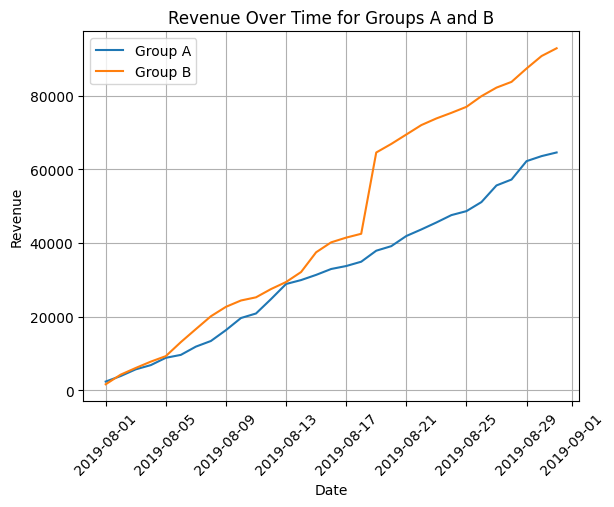

In [61]:
# plot revenue over time for group A and group B

# Filter data for group A and B
group_A_data = cumulative_data[cumulative_data['group'] == 'A']
group_B_data = cumulative_data[cumulative_data['group'] == 'B']

# Plot revenue over time for group A
plt.plot(group_A_data['date'], group_A_data['revenue'], label='Group A')

# Plot revenue over time for group B
plt.plot(group_B_data['date'], group_B_data['revenue'], label='Group B')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time for Groups A and B')
plt.legend()
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to view visual with grid

> <u>Revenue Over Time for Groups A and B</u> conclusion:
> - Revenue is rising steadily over time which is a good sign for the hypothesis testing. 
> - There is a spike for group B at a certain point. This could imply either a surge in number of orders or a presence of expensive orders in the sample of data. 

> <h1>Part 2 - Task #2 </h1>
> - Graph cumulative average order size by group. Make conclusions and conjectures.

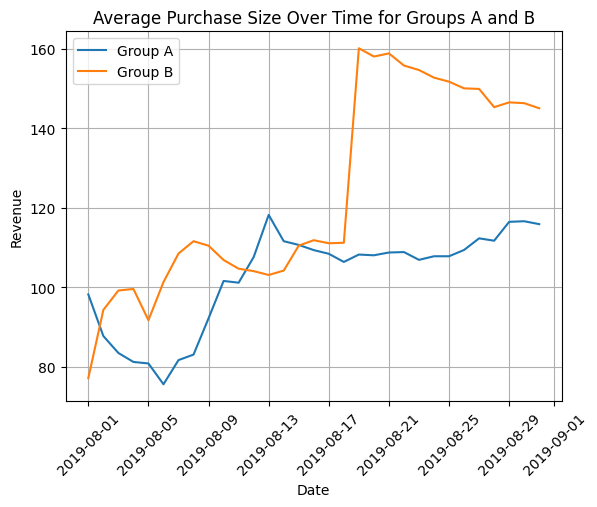

In [72]:
# plot average purchase size by group -- divide cumulative revenue by cumulative number of orders

plt.plot(group_A_data['date'], group_A_data['revenue']/group_A_data['orders'], label='Group A')
plt.plot(group_B_data['date'], group_B_data['revenue']/group_B_data['orders'], label='Group B')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Average Purchase Size Over Time for Groups A and B')
plt.legend()
plt.xticks(rotation=45)

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

> <u>Average Purchase Size Over Time for Groups A and B</u> conclusion:
> - we can see a similar spike in group B for average revenue over time
> - there is a dip (low) in average revenue for group A after August 5th and it spikes again after August 9th. 

> <h1>Part 2 - Task #3 </h1>
> - Graph the relative difference in cumulative average order size. Make conclusions and conjectures.

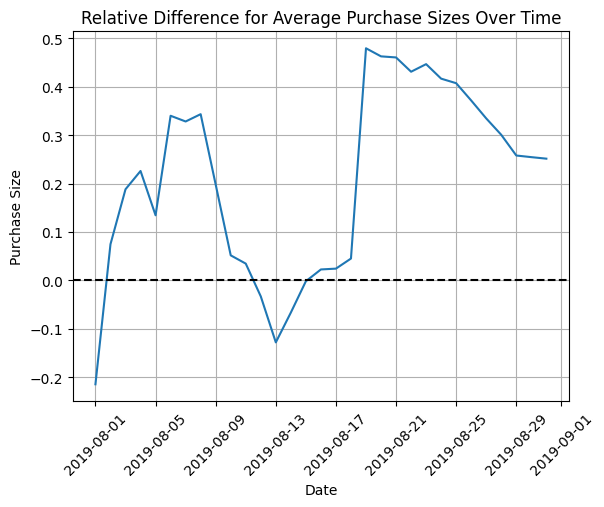

In [73]:
# plot the relative difference graph for the average purchases sizes


# gather data into one dataframe
merged_cumulative_revenue = group_A_data.merge(group_B_data, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plot relative difference graph for average purchase sizes
plt.plot(merged_cumulative_revenue['date'], 
        (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
        /
        (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Purchase Size')
plt.title('Relative Difference for Average Purchase Sizes Over Time')

# add the X axis
plt.axhline(y=0, color='black', linestyle='--')

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

> <u>Relative Differene for Average Purchase Size Over Time</u> conclusion:
> - At several points the difference between the segments dips and spikes. This could be due to big orders and outliers. 

> <h1>Part 2 - Task #4 </h1>
> - Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

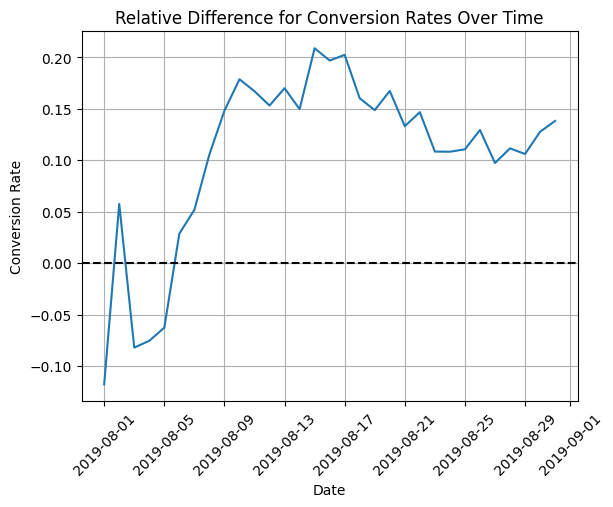

In [74]:
# Find the Relative Difference for Conversion Rates

# gather data into one dataframe
merged_cumulative_conversion = group_A_data.merge(group_B_data, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plot relative difference graph for conversion rates
plt.plot(merged_cumulative_conversion['date'], 
        (merged_cumulative_conversion['ordersB']/merged_cumulative_revenue['visitorsB'])
        /
        (merged_cumulative_revenue['ordersA']/merged_cumulative_revenue['visitorsA'])-1)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Relative Difference for Conversion Rates Over Time')

# add the X axis
plt.axhline(y=0, color='black', linestyle='--')

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

> <u>Relative Difference for Conversion Rates Over Time</u> conclusion:
> - Initially, there is a dip in conversion rates during the first few days of data collection. However, over time, it steadily increases, which aligns well with our hypothesis testing.

In [34]:
display(cumulative_data)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


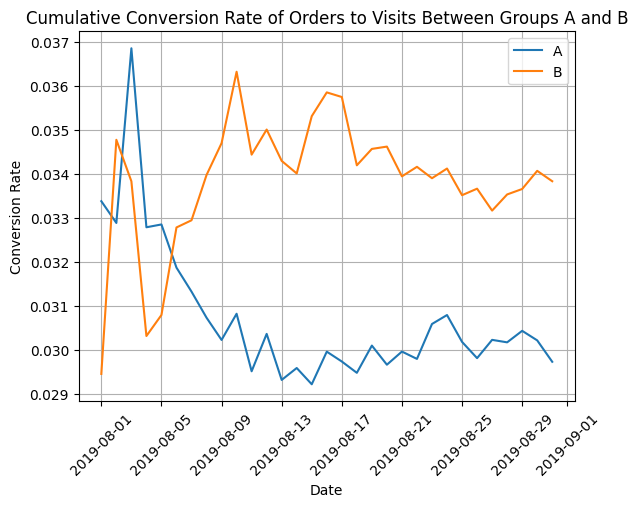

In [75]:
# calculate cumlative conversion rate 
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# selecting data for group A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# selecting data for group B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# plot graph 
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Cumulative Conversion Rate of Orders to Visits Between Groups A and B')


#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

> <u>Cumulative Conversion Rate of Orders to Visits Between Groups A and B</u> conclusion:
> - Initially, Group A exhibits a higher conversion rate compared to Group B, but this advantage diminishes over time. Ultimately, Group B maintains a higher conversion rate throughout the entire duration of the period of time being studied.
> - If we were only studying Group A, this hypothesis would fail because the highest conversion rate was reached during the first few days of the test, however, since we are also looking at the sample of data for Group B and there is a steady conversion rate; we will pursue onwards with the hypothesis testing.  

> <h1>Part 2 - Task #5</h1>
> - Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [36]:
display(df_orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [37]:
# calculate orders per user
orders_by_users = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

# give columns descriptive names
orders_by_users.columns = ['user_id', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False))

,user_id,orders
866,4256040402,11
385,2458001652,11
361,2378935119,9
270,2038680547,8
557,3062433592,5
...,...,...
358,2373765141,1
360,2378092656,1
362,238992583,1
363,2393492379,1


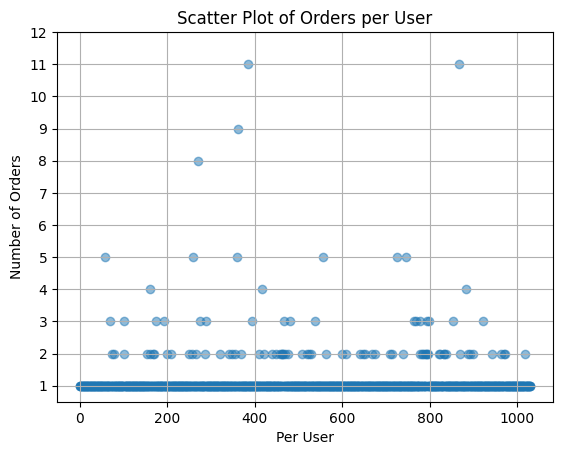

In [76]:
# plot scatter for orders per user

x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.5) #adding alpha=0.5 to make plot points semi-transparent thus being able to distinguish any potential overlapping plot points. )
plt.xlabel('Per User')
plt.ylabel('Number of Orders')
plt.yticks(range(1, 13))
plt.title('Scatter Plot of Orders per User')

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

> <u>Scatter Plot of Orders per User</u> conclusion:
> - Majority of users only place 1 order. However, there is also a significant amount of users placing 2-3 orders. 

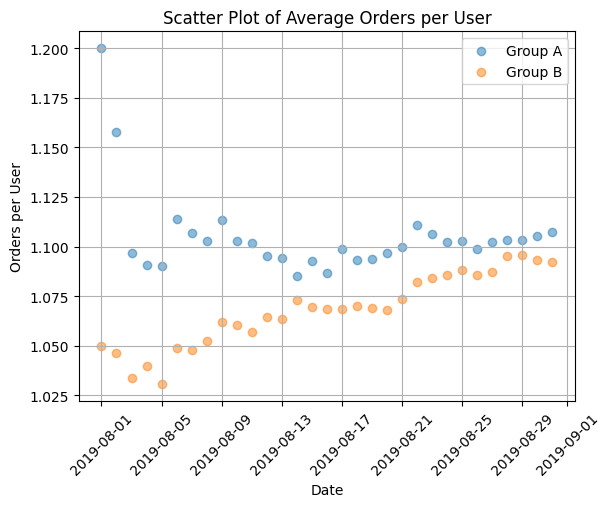

In [77]:
# there may be multiple orders per user -- calculate the average number of orders per user for each group based on 'cumulative_data'
cumulative_data['orders_per_user'] = cumulative_data['orders'] / cumulative_data['buyers']

# separate data for each group
group_A_data = cumulative_data[cumulative_data['group'] == 'A']
group_B_data = cumulative_data[cumulative_data['group'] == 'B']

# Plot scatter plot
plt.scatter(group_A_data['date'], group_A_data['orders_per_user'], label='Group A', alpha=0.5) #adding alpha=0.5 to make plot points semi-transparent thus being able to distinguish any potential overlapping plot points. 
plt.scatter(group_B_data['date'], group_B_data['orders_per_user'], label='Group B', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Orders per User')
plt.title('Scatter Plot of Average Orders per User')
plt.legend()
plt.xticks(rotation=45)

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.


> <u>Scatter Plot of Average Orders per User</u> conclusion: 
> - Group A has more orders per user compared to Group B. The highest average order per user in Group B is approximately the lowest average order in Group A. 

> <h1>Part 2 - Task #6</h1>
> - Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [40]:
# calculate 95th and 99th percentile

print(f"95th percentile = {np.percentile(orders_by_users['orders'], [95])}")
print(f"99th percentile = {np.percentile(orders_by_users['orders'], [99])}")

95th percentile = [2.]
99th percentile = [4.]


> <u>95th and 99th percentile</u> conclusion:
> - In the 95th percentile, no more than 5% of users placed more than 2 orders and in the 99th percentile no more than 1% of users placed more than 4 orders. Thus, anything above 4 orders will be an anomaly. It will also be reasonable to filter one to 4 orders per user for the number of orders made by users to filter out anomalies. 

> <h1>Part 2 - Task #7</h1>
> - Plot a scatter chart of order prices. Make conclusions and conjectures.

In [41]:
display(df_orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [42]:
# not asked in the task but an insightful metric to look at:

# lowest price in df_orders
lowest_price = df_orders['revenue'].min()

# highest price in df_orders
highest_price = df_orders['revenue'].max()

print("Lowest price: $", lowest_price)
print("Highest price: $", highest_price)


Lowest price: $ 5.0
Highest price: $ 19920.4


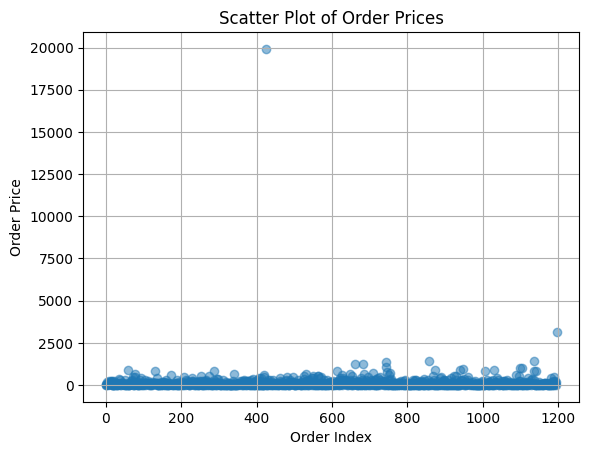

In [78]:
# plot scatter for orders prices

plt.scatter(range(len(df_orders)), df_orders['revenue'], alpha=0.5)
plt.xlabel('Order Index')
plt.ylabel('Order Price')
plt.title('Scatter Plot of Order Prices')

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

> <u>Scatter Plot of Order Prices</u> conclusion:
> - Majority of order prices are in a range between 0 to 2500 based on graph. There is an anomaly near $20,000.

> <h1>Part 2 - Task #8</h1>
> - Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [44]:
# calculate 95th and 99th percentile

print(f"95th percentile = {np.percentile(df_orders['revenue'], [95])}")
print(f"99th percentile = {np.percentile(df_orders['revenue'], [99])}")

95th percentile = [435.54]
99th percentile = [900.904]


> <u>95th and 99th percentile</u> conclusion:
> - Based on the data for 95th and 99th percentile, we can set a limit for orders between $0 and $1,000. The most extreme anomalies in the 1%-5% of observed values will be filtered out.
> - 5% of orders create a revenue of $435.54 and 1% of orders create a revenue of $900.90. Thus, anything above $1,000 will be an anomaly.

> <h1>Part 2 - Task #9</h1>
> - Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [45]:
display(df_visits)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


> <u>Explaination:</u>
> - To further elaborate why this test was used: the hypothesis we are testing is a quantitative study. Quantitive studies helps us determine the extent to which changes affect user behavior with considerable precision. However, they have certain limitations with respect to the interpretation of results and understanding users' motivation. 
> - There was not enough information or data provided in this project to conduct a Weighted Shortest Job First (WSJF) to prioritze which hypothesis to test, therefore the ICE and RICE method was used to determine which hypothesis can be prioritized.

In [90]:
print("\nHypotheses Sorted by RICE:")
display(df_rice_sorted)


Hypotheses Sorted by RICE:


,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,add a subscription form to all the main pages. this will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,add product recommendation blocks to the store's site. this will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,add two new channels for attracting traffic. this will bring 30% more users,3,10,8,6,13.333333,40.0
6,show banners with current offers and sales on the main page. this will boost conversion,5,3,8,3,8.000000,40.0
8,launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,change the category structure. this will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,launch your own delivery service. this will shorten delivery time,2,5,4,10,2.000000,4.0
5,add a customer review page. this will increase the number of orders,3,2,2,3,1.333333,4.0
4,change the background color on the main page. this will increase user engagement,3,1,1,1,1.000000,3.0


> - As mentioned earlier in the project, when hypotheses are sorted using the RICE method, hypothesis#7 score is significantly higher than all other hypotheses. 
> - In the RICE framework, it emphasizes not only the potential impact and confidence in a hypothesis but also considers the reach, ensuring that the hypotheses with the potential to impact a larger audience are prioritized, even if they required more effort.
> - We will be prioritizing testing hypothesis #7 as it has thehighest RICE score.

> - A/B testing will help reveal the differences between groups, if there are any.
> - An advantage of A/B testing is that it can be applied to various fields, since it's flexible and it's considered the most precise method of marketing research. 
> - If precision is not critically important, use market, competitor analysis, or data that's already available to conduct qualititative studies. However, for this project, precise measurements are needed, thus, a quantitative study (A/B testing) is used here.

> - In A/B testing, the null hypothesis and alternative hypothesis are two competing statements about the population parameters being tested. They help in determining whether there is a statistically significant difference between the groups being compared.

> - <u>Null Hypothesis</u> (H₀): The null hypothesis typically states that there is no significant difference between the groups being compared. It suggests that any observed difference in the outcomes of the A and B groups is due to random chance or sampling variability.
> - Null Hypothesis (H₀): <b>μA = μB</b> (There is no significant difference between Group A and Group B)

> - <u>Alernative Hypothesis</u> (H₁): The alternative hypothesis contradicts the null hypothesis. It suggests that there is a significant difference between the groups being compared, indicating that the observed results are not simply due to chance.
> - Alternative Hypothesis (H₁): <b>μA ≠ μB</b> (There is a difference in Group A and Group B)

> - In this study using hypthesis #7, the null hypothesis (H₀) = Using data between Group A and Group B, adding a subscription form to all main pages will not significantly affect the compilation of the mailing list. The alternative hypothesis (H₁) = Using data between Group A and Group B, adding a subscription form to all main pages will significantly help compile a mailing list.

> - The choice of null and alternative hypotheses is crucial in A/B testing, as it determines the direction of the test and what conclusions can be drawn from the results.
> - In statistical hypothesis testing, the aim is to <u>gather evidence</u> <u>against</u> the <u>null hypothesis</u>. If the evidence is strong enough, meaning the observed difference is unlikely to have occurred by chance alone, then the null hypothesis is rejected in favor of the alternative hypothesis. Otherwise, if there is insufficient evidence, the null hypothesis is retained.



In [155]:
# Formulate a null hypothesis and alternative hypothesis, suggested by reviewer's v1 comment


#define a test statistic and perform on prioritized hypothesis to formulate null and alternative hypthesis
# Null and Alternative Hypotheses
# H₀: The addition of a subscription form to all main pages will have no impact on mailing list compilation between Group A and Group B
# H₁: The addition of a subscription form to all main pages will have no impact on mailing list compilation between Group A and Group B
# If the p-value is less than your chosen alpha level, you would reject the null hypothesis and conclude that there is a significant difference between the groups. Otherwise, you would fail to reject the null hypothesis.


#define a test statistic and perform on prioritized hypothesis#7 between group A and group B
from scipy.stats import ttest_ind

# Define alpha level
alpha = 0.05


# Print unique visit data for groups A and B previously solved for -- counting the number of unique visits in group A and group B
# Compare the counts
if num_visitors_group_A == num_visitors_group_B:
    print("There is the same amount of unique visits in group A and group B.")
else:
    print("There is a different amount of unqiue visits in group A and group B.")
print(f"Number of visits in group A: {num_visits_group_A}")
print(f"Number of visits in group B: {num_visits_group_B}")
# the unique count of visits in Group A and Group B are different


print( ) #create a break in output for readibility


"""
# perform Welch's t-test
t_statistic, p_value = ttest_ind(visits_A, visits_B, equal_var=False)
print("Welch's t-test:")
print("t-statistic=", t_statistic)
print("p-value=", p_value)

# Perform t-test
t_statistic, p_value = ttest_ind(visits_A, visits_B)

# Define Bonferroni-corrected alpha level
bonferroni_alpha = alpha / 2  # Dividing alpha by the number of comparisons (2)
print("bonferroni alpha=", bonferroni_alpha)

# Compare p-value to bonferroni alpha
if p_value < bonferroni_alpha:
    print("Reject the null hypothesis. The addition of a subscription form to all main pages will have no impact on mailing list compilation between Group A and Group B")
else:
    print("Fail to reject the null hypothesis. The addition of a subscription form to all main pages will have no impact on mailing list compilation between Group A and Group B")
"""
# comment out, solve variances for nonparametric data instead



# due to unequal variances, perform Mann-Whitney-U test
# This test can solve for nonparametric data where there is differences in sample sizes and variances between the groups. 
# This nonparametric method is useful because it does not make assumptions about how the data is distributed when it is difficult to determine parameters based on outliers 

results = st.mannwhitneyu(visits_A, visits_B, True, 'less')
print("Mann-Whitney-U test:")
print("alpha=", alpha)
print("p-value= ", results.pvalue)

if (results.pvalue < alpha):
       print("Reject the null hypothesis: the difference is significant.")
else:
    print("Fail to reject the null hypothesis: we cannot make conclusions about the difference.")


There is a different amount of unqiue visits in group A and group B.
Number of visits in group A: 31
Number of visits in group B: 30

Mann-Whitney-U test:
alpha= 0.05
p-value=  0.36506882746952496
Fail to reject the null hypothesis: we cannot make conclusions about the difference.


In [154]:
# calculate statistical signficance of the difference in conversion between groups using raw data


# find number orders per user per group
orders_by_users_A = df_orders[df_orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = df_orders[df_orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
orders_by_users_B.columns = ['user_id', 'orders']


# declare users from different groups with corresponding number of orders
sample_A = pd.concat([orders_by_users_A['orders'], 
    pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')], axis=0)

sample_B = pd.concat([orders_by_users_B['orders'], 
    pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')], axis=0)


# print p-value 
print("p-value: ", '{0:.3f}'.format(stats.mannwhitneyu(sample_A, sample_B)[1]))

# print relative conversion gain for Group B
print("difference: ", '{0:.3f}'.format(sample_B.mean()/sample_A.mean()-1))

p-value:  0.017
difference:  0.138


> <u>Statistical Significance of the Difference in Conversion Using Raw Data</u> conclusion: 
> - based on the raw data, with a p-value of 0.017, there is a statistically significant difference in conversion rates between the two groups. This suggests that the conversion rates of Group A and Group B are likely not equal. 
> - On the other hand, with a p-value of 0.138, it would fail to reject the null hypothesis, indicating that there is no statistically significant difference in conversion rates between the two groups. This suggests that the conversion rates of Group A and Group B are likely similar.

> <h1>Part 2 - Task #10</h1>
> - Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [156]:
# calculate the statistical significance of the difference in average order size usingg raw data

# p-value
print("p-value: ", '{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))

# difference between Group AGroup B
print("difference: ", '{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))


p-value:  0.692
difference:  0.252


> <u>Statistical Significance of the Difference in Average Order Size Using Raw Data</u> conclusion: 
> - With a p-value of 0.692, we fail to reject the null hypothesis. There is no statistically significant difference in average order size between Group A and Group B.
> - With a p-value of 0.252, we fail to reject the null hypothesis. There is no statistically significant difference in average order size between Group B and Group A.
> - Based on the p-values of average order sizes using raw data, we cannot conclude that there is a statistically significant difference in average order size between Group A and Group B. Both groups appear to have similar average order sizes.


> <h1>Part 2 - Task #11</h1>
> - Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [164]:
#find number of anomalous users using shape() method to be able to complete task:

"""
users_with_many_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 1]['user_id'], orders_by_users_B[orders_by_users_B['orders'] > 1]['user_id']], axis=0) # > 1 order per user based on scatter plot
users_with_expensive_orders = df_orders[df_orders['revenue'] > 2500]['visitor_id'] # > 2500 per order based on scatter plot

abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()
display(abnormal_users)
print(abnormal_users.shape)
"""


#v2 edit: create variable where percentile is passed so code can be re-used if there are changes to the dataset df_orders, suggested by reviewer v1 comment.
max_revenue = int(np.percentile(df_orders['revenue'], [95]))

users_with_many_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > max_revenue]['user_id'], orders_by_users_B[orders_by_users_B['orders'] > max_revenue]['user_id']], axis=0) 
users_with_expensive_orders = df_orders[df_orders['revenue'] > max_revenue]['visitor_id'] 

abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()
display(abnormal_users)
print(abnormal_users.shape)

1103    1164614297
137     1211585711
1136    1307669133
858     1316129916
421     1357170471
549     1367935136
562     1452540367
1099     148427295
1121    1604853044
1038    1605520752
420     1606766439
425     1920142716
928      204675465
1196    2108080724
570     2247666522
287     2254456485
131     2254586615
1006    2261934787
273     2278620397
755     2279926127
697     2378935119
1142    2606908679
254     2686716486
527     2837914161
925     2840985286
890     2853587382
530     2912540959
73      2947100995
173     2953427180
960     2999642019
1096    3062433592
208     3118156181
481     3177790019
78      3288820196
746     3321013705
728     3357398384
867     3372131337
684      358944393
1087    3590655705
648      382846391
613     3931967268
1189     393266494
496     3951559397
940     4003628586
723     4009017467
627     4120364173
743     4133034833
60      4256040402
662     4266935830
751      689129267
1137     759473111
77       787824685
654      816

(58,)


In [157]:
# Calculate the statistical significance of the differences in conversions between groups using filtered data


# prepare samples of the number of orders per user for each test group
sample_A_filtered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))]['orders'], pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')], axis=0)
sample_B_filtered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))]['orders'], pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')], axis=0)

# apply statistical Mann-Whitney-U
print("p-value: ", '{0:.3f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
#difference
print("difference:", '{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))


p-value:  0.015
difference: 0.164


> <u>Statistical Significance of the Differences in Conversions Between Groups Using Filtered Data</u> conclusion:
> - The results remained consistent across both raw and filtered data, with no substantial changes observed in statistical significance.
> - Raw data = 0.017, Filtered data = 0.015. The difference in conversion for Group A is slightly lower when using filtered data compared to raw data, although both p-values are still below the significance level.
> - Raw data = 0.138, Filtered data = 0.164. The difference in conversion for Group B is slightly higher when using filtered data compared to raw data, with both p-values still failing to surpass the significance level.

> <h1>Part 2 - Task #12</h1>
> - Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [158]:
# Calculate statistical significance of difference in average order size using filtered data


# p-value
group_A_filtered = df_orders[np.logical_and(df_orders['group'] == 'A', np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue']
group_B_filtered = df_orders[np.logical_and(df_orders['group'] == 'B', np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue']
statistic, p_value = stats.mannwhitneyu(group_A_filtered, group_B_filtered)
print("p-value: ",'{:.3f}'.format(p_value))

# difference
group_B_mean = df_orders[np.logical_and(df_orders['group'] == 'B', np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()
group_A_mean = df_orders[np.logical_and(df_orders['group'] == 'A', np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()
print("difference: ", '{:.3f}'.format(group_B_mean / group_A_mean - 1))


p-value:  0.807
difference:  -0.081


> <u>Statistical Significance of the Difference in Average Order Size Using Filtered Data</u> conclusion: 
> - Filtered data = 0.807, Raw data = 0.692. The difference in average order size for Group A appears to increase slightly when using filtered data compared to raw data, although both p-values indicate no statistically significant difference.
> - Filtered data = -0.081, Raw data = 0.252. TThe difference in average order size for Group B shows a decrease when using filtered data compared to raw data. However, neither p-value indicates a statistically significant difference.
> - Thus, when using filtered data, there are slight fluctuations in the statistical significance of the difference in average order size for both groups compared to raw data. However, in both cases, the differences remain nonsignificant.

> <h1>Part 2 - Task #13</h1>
> - Make a decision based on the test results. The possible decisions are: 
> 1. Stop the test, consider one of the groups the leader. 
> 2. Stop the test, conclude that there is no difference between the groups. 
> 3. Continue the test.

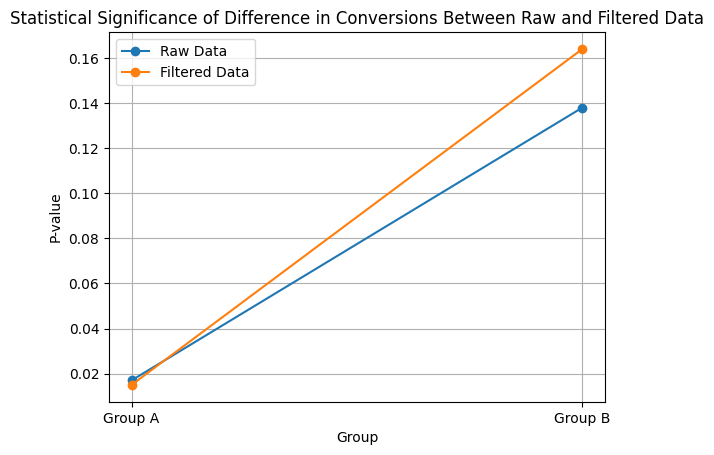

In [79]:
# Visual of Statistical Significance of the Difference in Converesions Between Raw and Filtered Data

# P-values for Group A and Group B using raw data
p_values_raw = [0.017, 0.138] 

# P-values for Group A and Group B using filtered data
p_values_filtered = [0.015, 0.164] 

# Plot the p-values
groups = ['Group A', 'Group B']
plt.plot(groups, p_values_raw, marker='o', label='Raw Data')
plt.plot(groups, p_values_filtered, marker='o', label='Filtered Data')
plt.xlabel('Group')
plt.ylabel('P-value')
plt.title('Statistical Significance of Difference in Conversions Between Raw and Filtered Data')
plt.legend()

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.


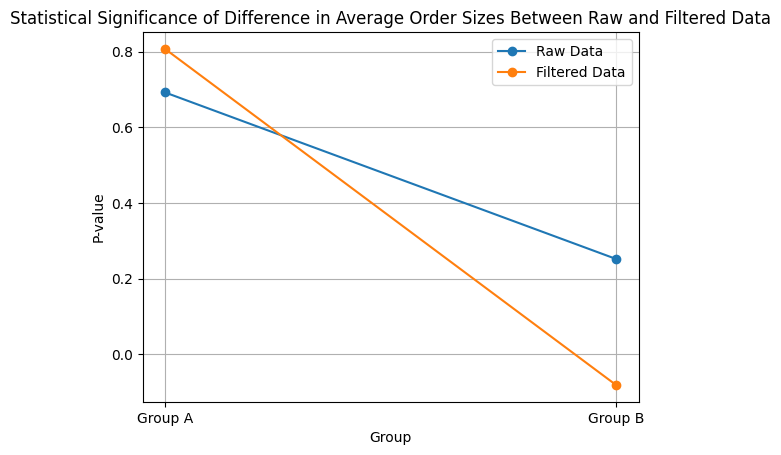

In [80]:
# Visual of Statistical Significance of the Difference in Average Order Sizes Between Raw and Filtered Data


# P-values for Group A and Group B using raw data
p_values_raw = [0.692, 0.252] 

# P-values for Group A and Group B using filtered data
p_values_filtered = [0.807, -0.081]  
# Plot the p-values
groups = ['Group A', 'Group B']
plt.plot(groups, p_values_raw, marker='o', label='Raw Data')
plt.plot(groups, p_values_filtered, marker='o', label='Filtered Data')
plt.xlabel('Group')
plt.ylabel('P-value')
plt.title('Statistical Significance of Difference in Average Order Sizes Between Raw and Filtered Data')
plt.legend()

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.


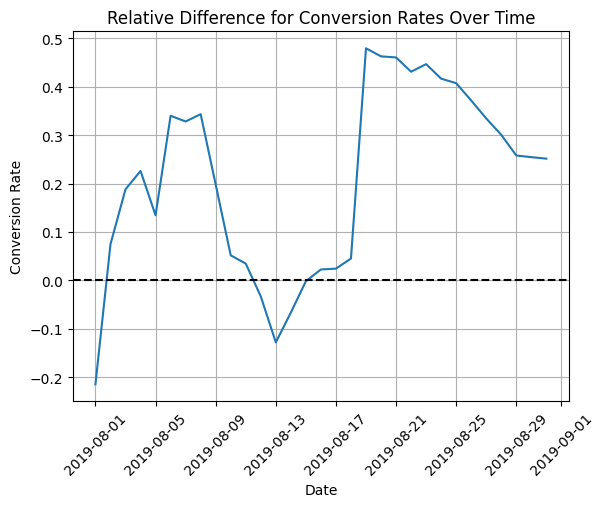

In [81]:
# Visual for Relative Difference for Conversion Rates Over Time


# gather data into one dataframe
merged_cumulative_revenue = group_A_data.merge(group_B_data, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plot relative difference graph for average purchase sizes
plt.plot(merged_cumulative_revenue['date'], 
        (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
        /
        (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Relative Difference for Conversion Rates Over Time')

# add the X axis
plt.axhline(y=0, color='black', linestyle='--')

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

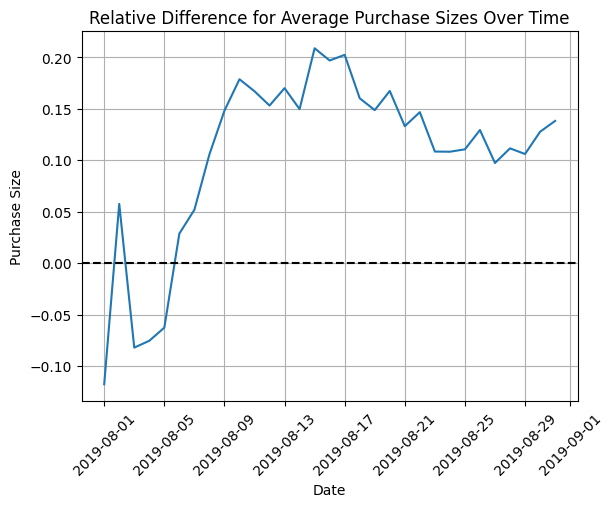

In [82]:
# Visual for Relative Difference for Conversion Rates

# gather data into one dataframe
merged_cumulative_conversion = group_A_data.merge(group_B_data, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plot relative difference graph for conversion rates
plt.plot(merged_cumulative_conversion['date'], 
        (merged_cumulative_conversion['ordersB']/merged_cumulative_revenue['visitorsB'])
        /
        (merged_cumulative_revenue['ordersA']/merged_cumulative_revenue['visitorsA'])-1)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Purchase Size')
plt.title('Relative Difference for Average Purchase Sizes Over Time')

# add the X axis
plt.axhline(y=0, color='black', linestyle='--')

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

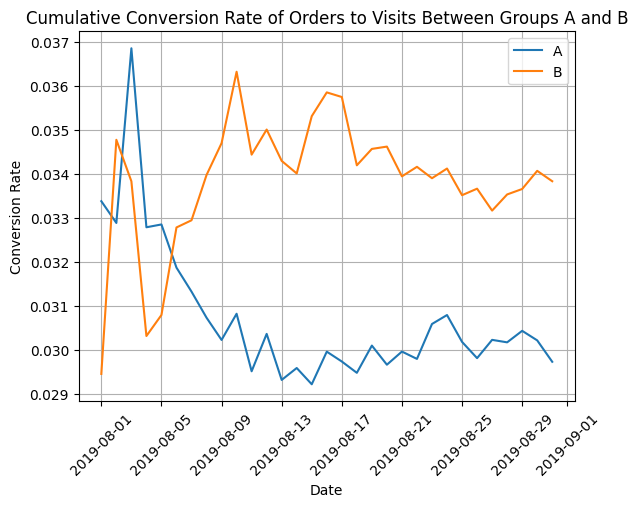

In [83]:
# Visual for Cumultive Conversion Rate of Orders to visits Between Group A and B

# calculate cumlative conversion rate 
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# selecting data for group A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# selecting data for group B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# plot graph 
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Cumulative Conversion Rate of Orders to Visits Between Groups A and B')

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

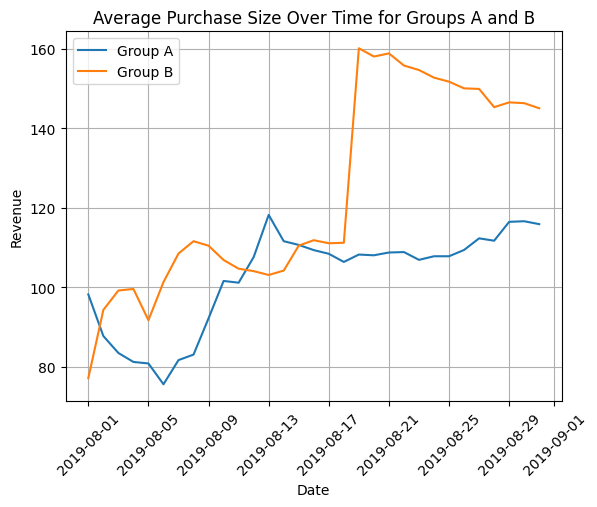

In [84]:
# Visual for Average Purchase Size Over Time for Groups A and B

plt.plot(group_A_data['date'], group_A_data['revenue']/group_A_data['orders'], label='Group A')
plt.plot(group_B_data['date'], group_B_data['revenue']/group_B_data['orders'], label='Group B')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Average Purchase Size Over Time for Groups A and B')
plt.legend()
plt.xticks(rotation=45)

#plt.show()
plt.grid() #instead of using plt.show, using plt.grid to keep visuals cohesive.

> <u>Conclusions that we draw between from the tests conducted</u>:
> - neither raw nor filtered data revealed any statistical significance in the conversions between group A and group B.
> - neither raw nor filtered data revealed any statistical significance in the average order size between group A and group B.
> - relative conversion rates fluctuate significantly over time with major decrease around August 13th, 2018 and a sudden significant spike after August 17th, 2018.
> - relative average purchase size also shows fluctuations over time, where there is an initial decrease in orders followed by a sudden increase. However, after it maintains a consistent order volume over the duration of the rest of the observation period.
> - when comparing groups A and B separately when looking at conversion rates and average order sizes, Group B does significantly better than Group A. 

> Based on the observations from the conducted tests, it shows the test has not yielded successful results. Therefore, it is recommended to discontinue the test, as there appears to be no advantage in continuing it, given the probability that Group B will outperform Group A.